In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Adding data (employee.csv file uploading)

In [ ]:
url='https://drive.google.com/file/d/1HcUxZklZD4fi0RFestG31Lf37ztvFfXg/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
df.tail()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0
1676,1676,36,Travel_Rarely,1141,Research & Development,20,3,Life Sciences,1,3,...,80,0,10,3,2,8,2,7,3,0


In [ ]:
df.shape

(1677, 35)

In [ ]:
df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
df.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [ ]:
df_new = df[['BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition']]

## Creating report from raw data analyzed before

In [ ]:
for i in df_new.columns:
    print(i,':')
    print('Unique Values:', df_new[i].unique())
    print('Value Counts:')
    print(df_new[i].value_counts())
    print('\n')

BusinessTravel :
Unique Values: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Value Counts:
BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: count, dtype: int64


Department :
Unique Values: ['Research & Development' 'Sales' 'Human Resources']
Value Counts:
Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: count, dtype: int64


Education :
Unique Values: [ 3  4  1  2  5 15]
Value Counts:
Education
3     682
4     464
2     304
1     182
5      44
15      1
Name: count, dtype: int64


EducationField :
Unique Values: ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Value Counts:
EducationField
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: count, dtype: int64


EnvironmentSatisfaction :
Unique Values: [4 1 3 2]
Value Counts:
EnvironmentS

## Building plots based on columns to anayze a ratio between data there

Pieplot for: BusinessTravel


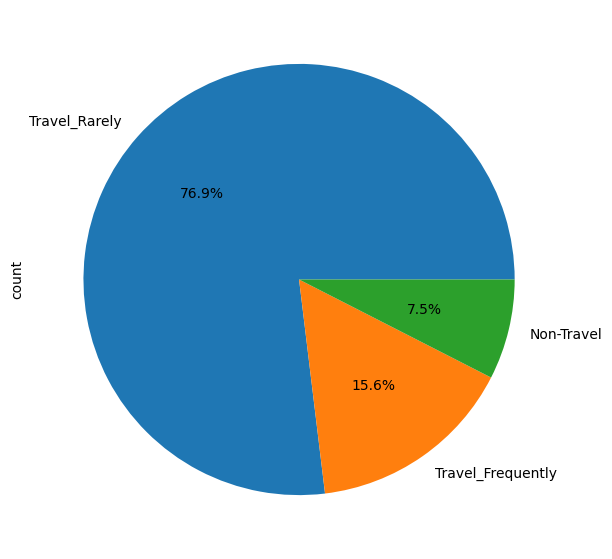



Pieplot for: Department


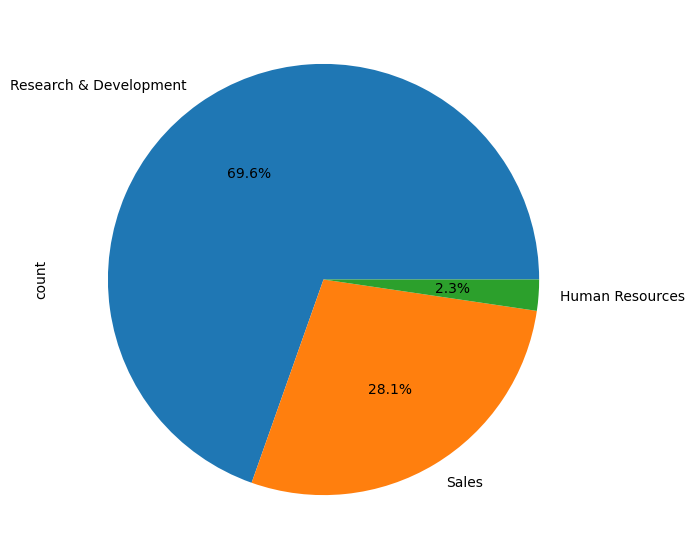



Pieplot for: Education


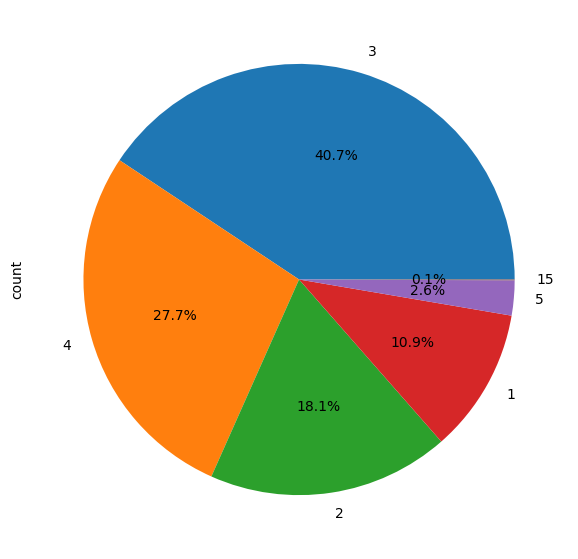



Pieplot for: EducationField


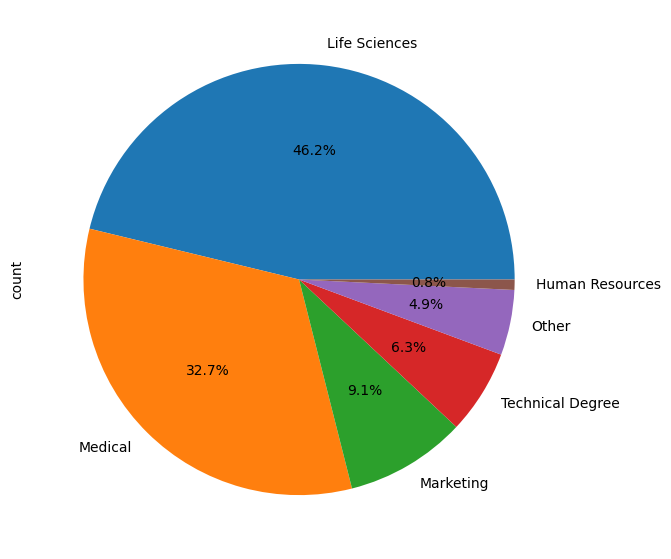



Pieplot for: EnvironmentSatisfaction


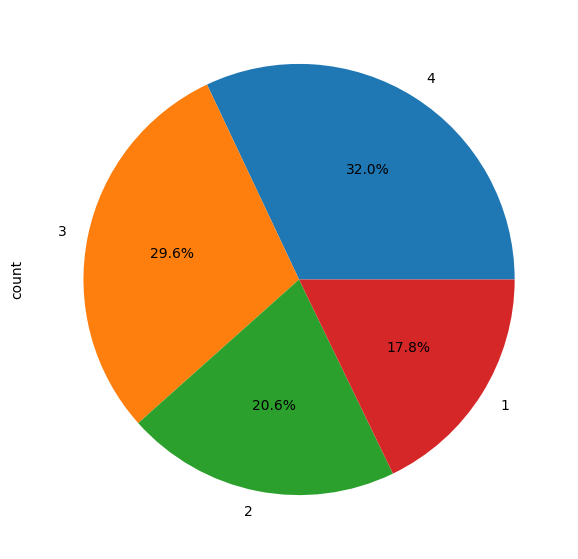



Pieplot for: Gender


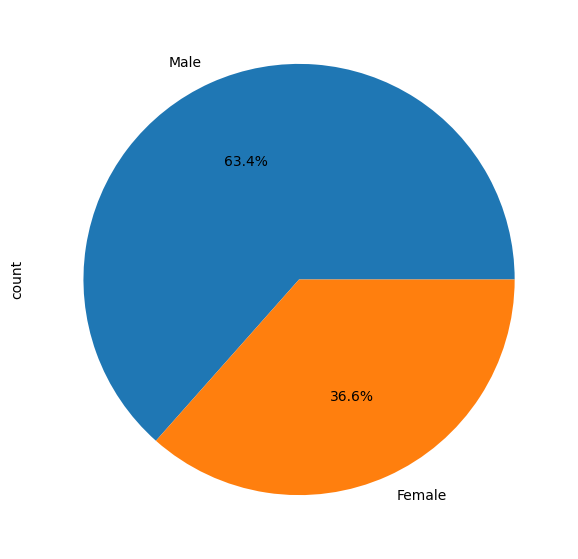



Pieplot for: JobInvolvement


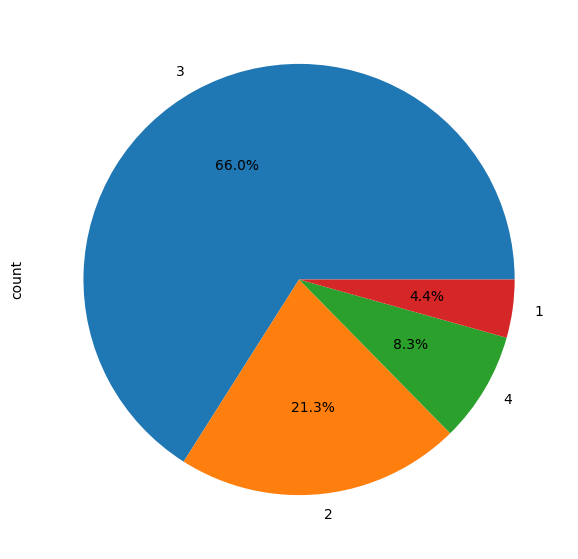



Pieplot for: JobRole


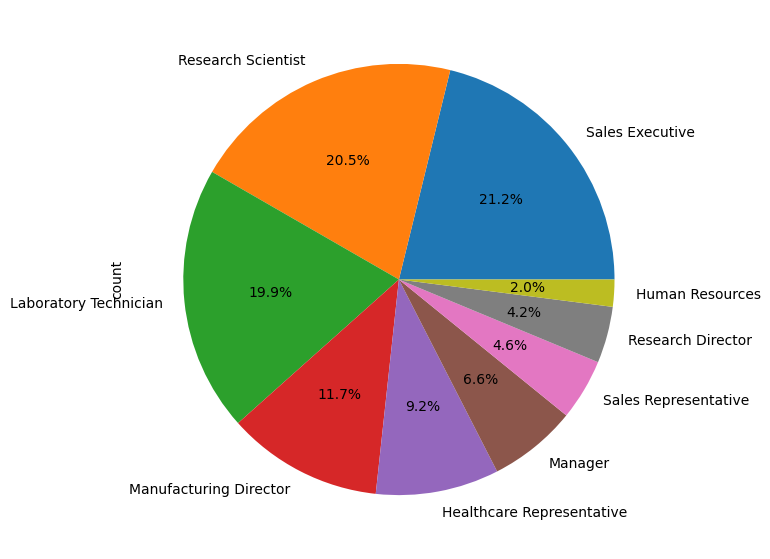



Pieplot for: JobSatisfaction


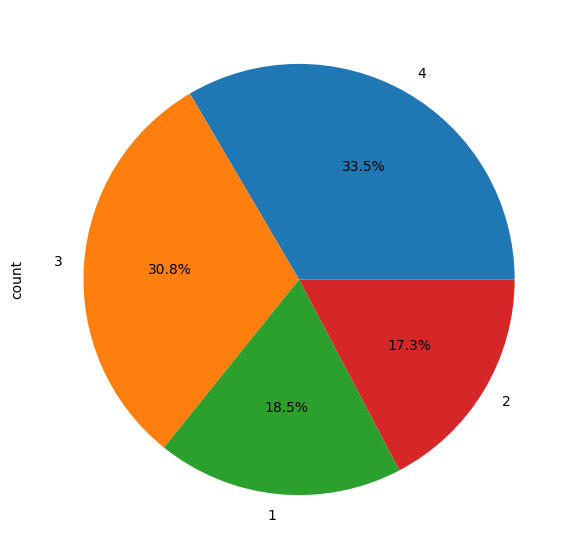



Pieplot for: MaritalStatus


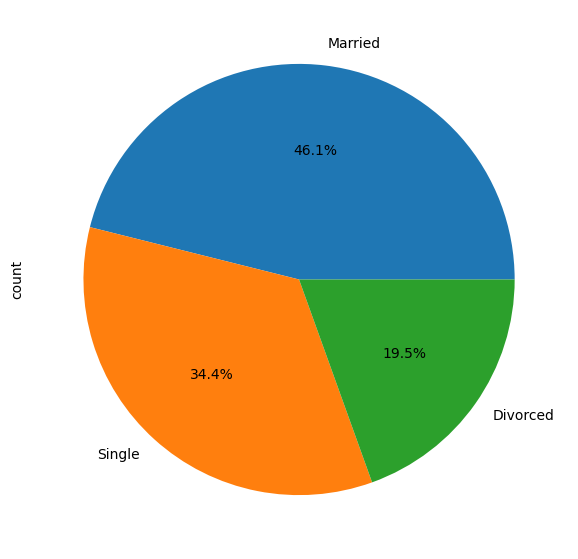



Pieplot for: NumCompaniesWorked


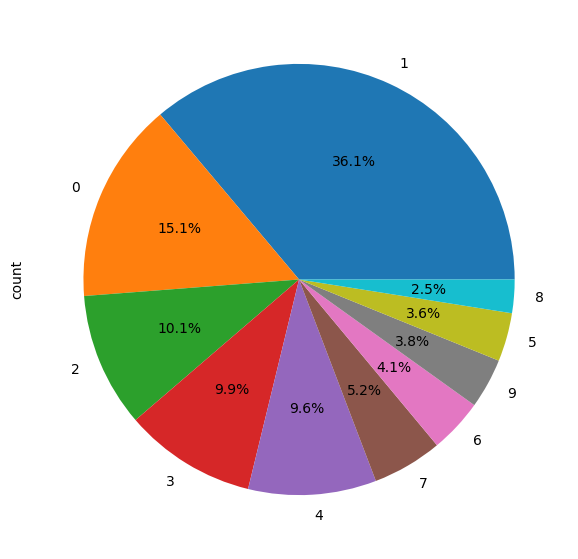



Pieplot for: OverTime


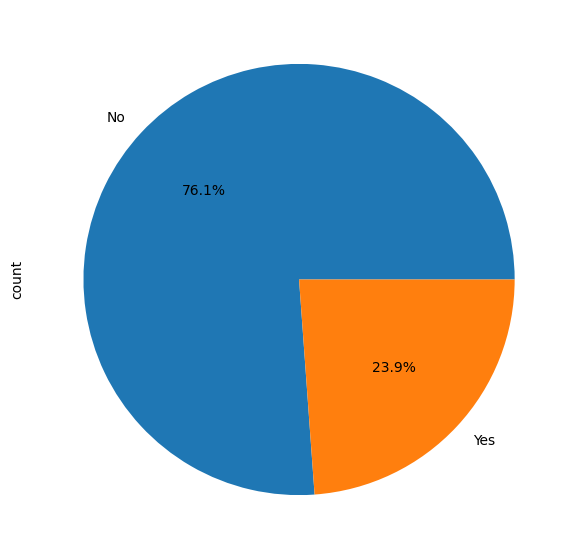



Pieplot for: PerformanceRating


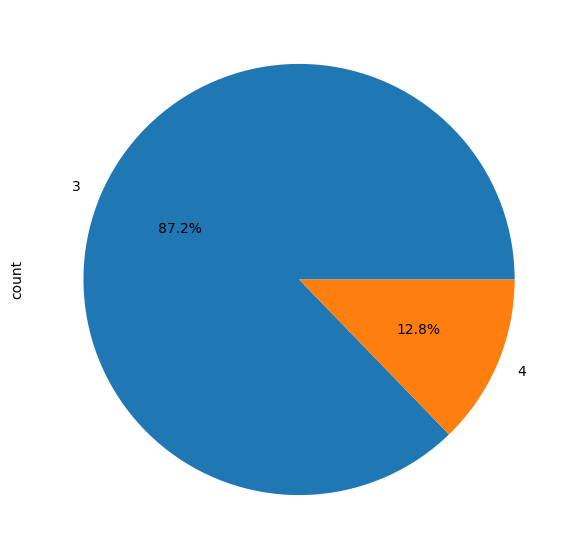



Pieplot for: RelationshipSatisfaction


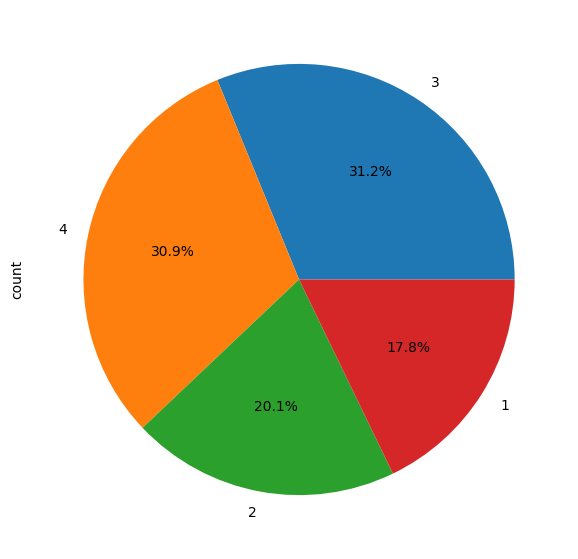



Pieplot for: StockOptionLevel


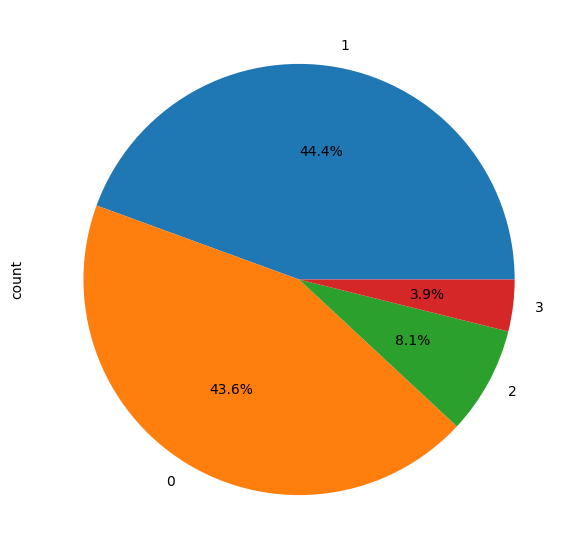



Pieplot for: TrainingTimesLastYear


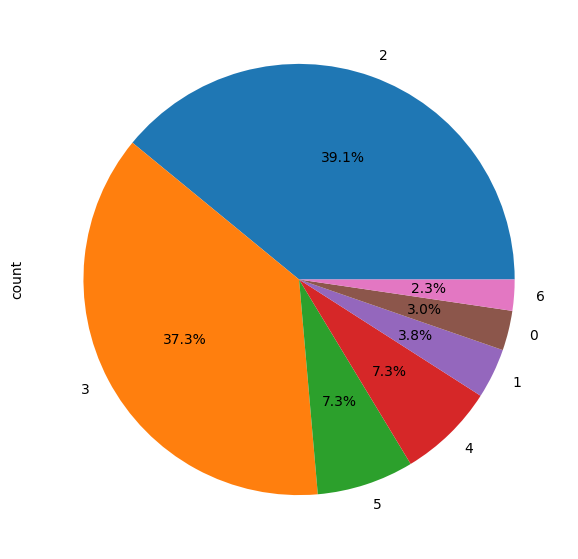



Pieplot for: WorkLifeBalance


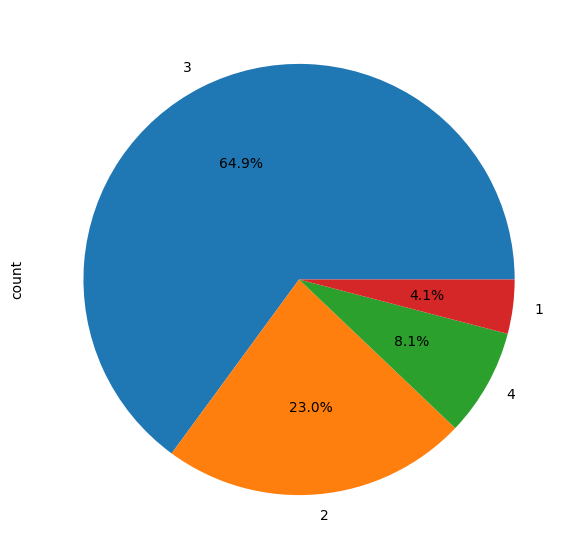



Pieplot for: Attrition


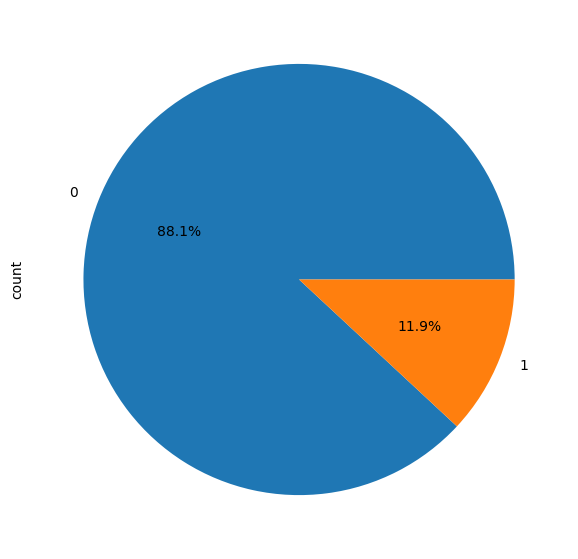

In [ ]:
#trying pie charts to represent the data
for i in df_new.columns:
    plt.figure(figsize=[15,7],)
    print('Pieplot for:', i)
    df_new[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    print('\n')

In [ ]:
#Identify the int and objects column based on record's data type
int_cols = [col for col in df.columns if df[col].dtype == 'int64']
print('Integer columns:', int_cols)

print('\n')

obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print('Object columns:', obj_cols)

Integer columns: ['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


Object columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


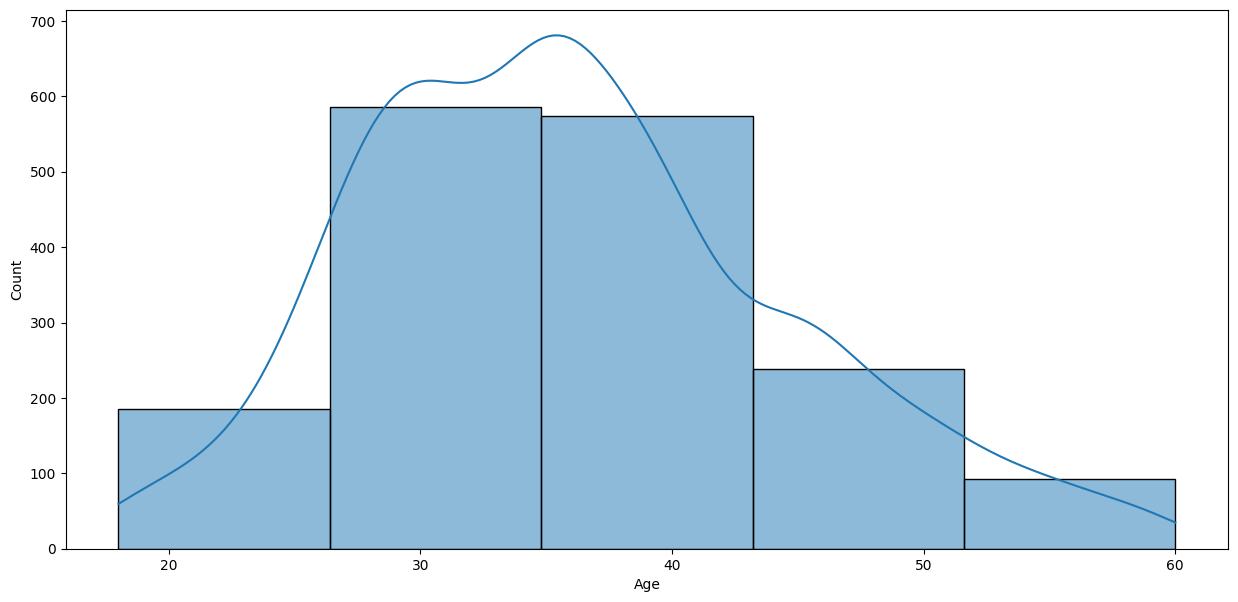

In [ ]:
# Age analyzing
plt.figure(figsize=[15,7],)
sns.histplot(df['Age'], kde = 'True', bins = 5, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

## Present relation of defined points to Attrition Rating using box plots

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'Age')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'DailyRate')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'DistanceFromHome')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'Education')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'EnvironmentSatisfaction')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'JobLevel')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'JobSatisfaction')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'MonthlyIncome')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'PercentSalaryHike')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'RelationshipSatisfaction')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'TotalWorkingYears')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'WorkLifeBalance')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'YearsAtCompany')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'YearsInCurrentRole')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'YearsSinceLastPromotion')
fig.show()

In [ ]:
fig = px.box(df, x = 'Attrition', y = 'YearsWithCurrManager')
fig.show()

## Encoding with LabelEncoder to transform non-numerical labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [ ]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,1,599,1,24,3,3,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,2,921,2,8,3,4,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,2,718,2,26,3,2,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,2,1488,1,2,3,3,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,2,1017,1,5,4,3,1,2,...,80,0,31,0,3,31,14,4,10,1


## Use corr() function to find the correlation among the columns in the Dataframe using the ‘Pearson’ method

In [ ]:
corr = df.corr()

**Correlation** — A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

* 1 is a perfect positive correlation
* 0 is no correlation (the values don’t seem linked at all)
* -1 is a perfect negative correlation*


In [ ]:
corr

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,1.000000,0.027563,-0.031831,0.003572,0.014652,0.007871,-0.015997,-0.007152,NaN,0.044271,...,NaN,-0.041337,-0.004288,0.010423,-0.006236,-0.020820,-0.020064,-0.002203,-0.005955,-0.006598
Age,0.027563,1.000000,0.017462,0.039686,-0.014663,-0.049025,0.223545,-0.018181,NaN,0.029557,...,NaN,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601,-0.161044
BusinessTravel,-0.031831,0.017462,1.000000,-0.015708,-0.020004,0.005933,-0.018889,0.004240,NaN,-0.002002,...,NaN,-0.047337,0.008332,0.031099,-0.012355,-0.040091,-0.079881,-0.021144,-0.064886,0.000552
DailyRate,0.003572,0.039686,-0.015708,1.000000,0.025107,0.024168,-0.007035,-0.021046,NaN,0.006483,...,NaN,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969,-0.022380
Department,0.014652,-0.014663,-0.020004,0.025107,1.000000,0.029781,0.013881,-0.065715,NaN,-0.000465,...,NaN,-0.005868,0.021490,0.046363,-0.012399,0.022345,0.029925,0.053127,0.041859,0.031996
DistanceFromHome,0.007871,-0.049025,0.005933,0.024168,0.029781,1.000000,-0.011436,-0.023405,NaN,0.004959,...,NaN,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749,0.024741
Education,-0.015997,0.223545,-0.018889,-0.007035,0.013881,-0.011436,1.000000,-0.019603,NaN,-0.011189,...,NaN,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573,-0.084305
EducationField,-0.007152,-0.018181,0.004240,-0.021046,-0.065715,-0.023405,-0.019603,1.000000,NaN,0.028366,...,NaN,-0.016655,-0.008423,0.070101,0.008050,0.012349,0.025646,-0.001262,-0.000790,-0.006513
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.044271,0.029557,-0.002002,0.006483,-0.000465,0.004959,-0.011189,0.028366,NaN,1.000000,...,NaN,0.002093,0.022254,-0.028982,0.045387,0.009290,0.016942,0.028711,0.022839,-0.092426


## Visualize correlation using heatmap

**A heatmap (or heat map)** is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance.

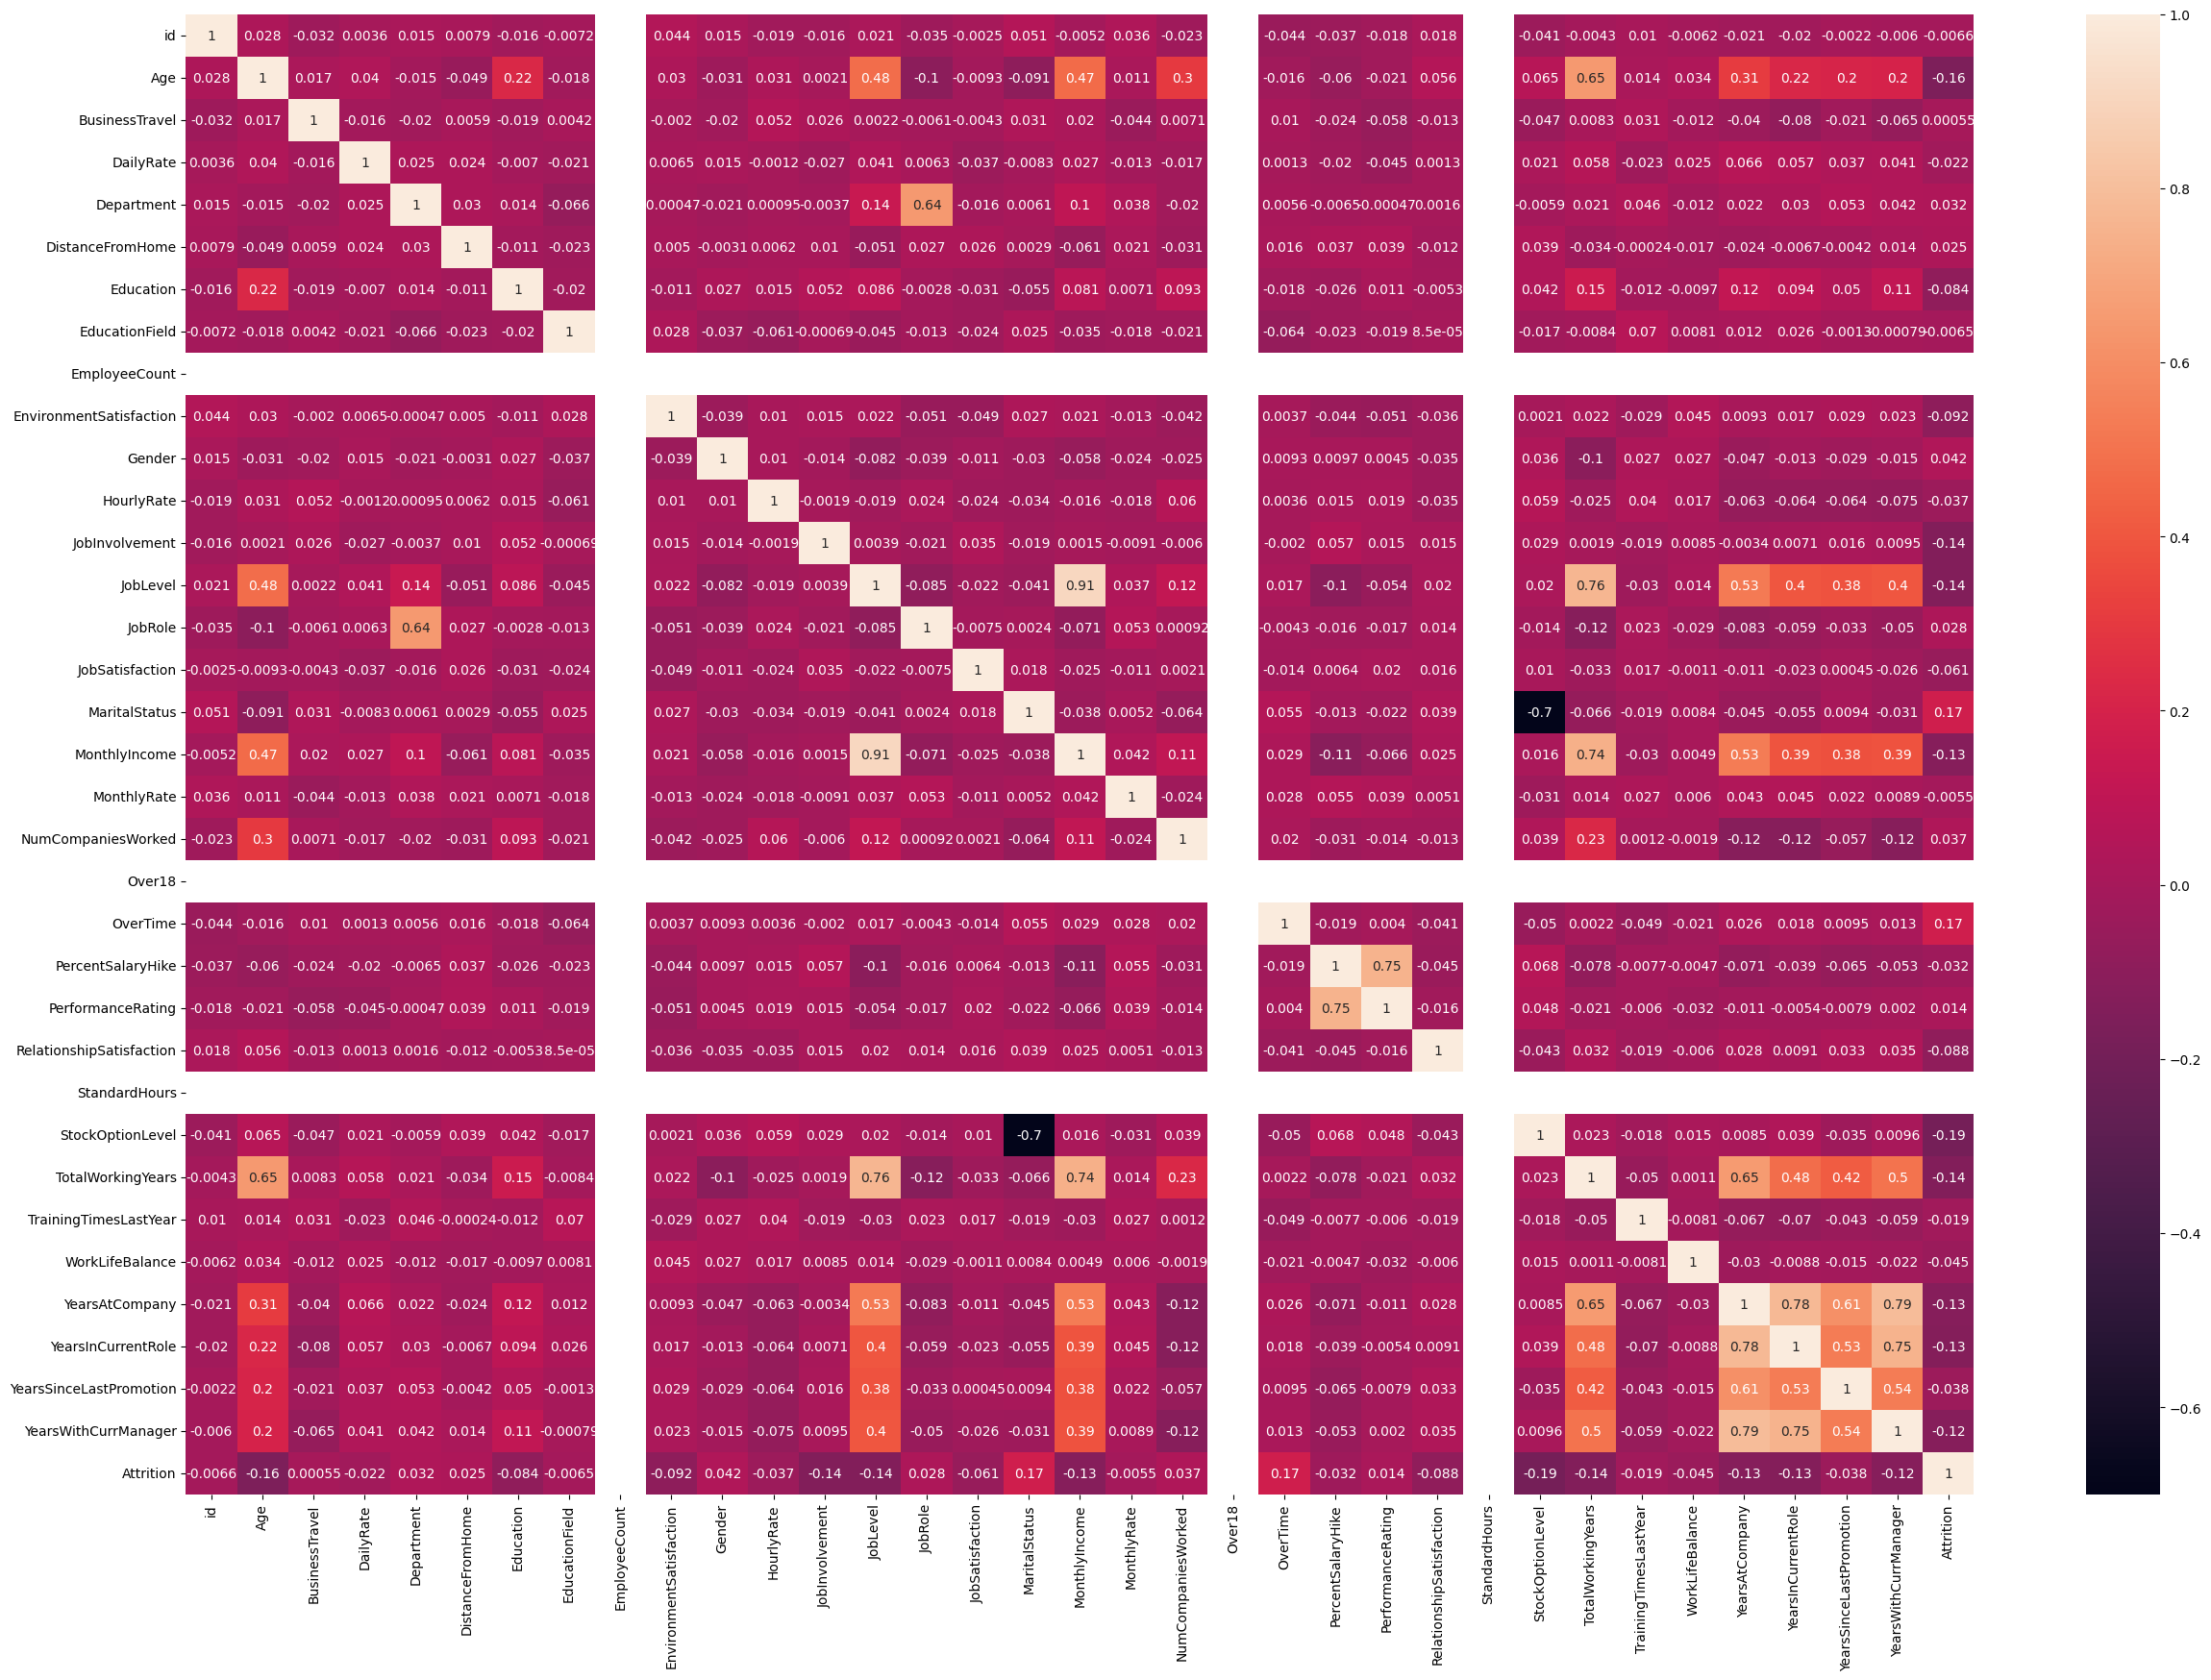

In [ ]:
plt.figure(figsize=[30,20],)
sns.heatmap(corr, annot = True)
plt.show()

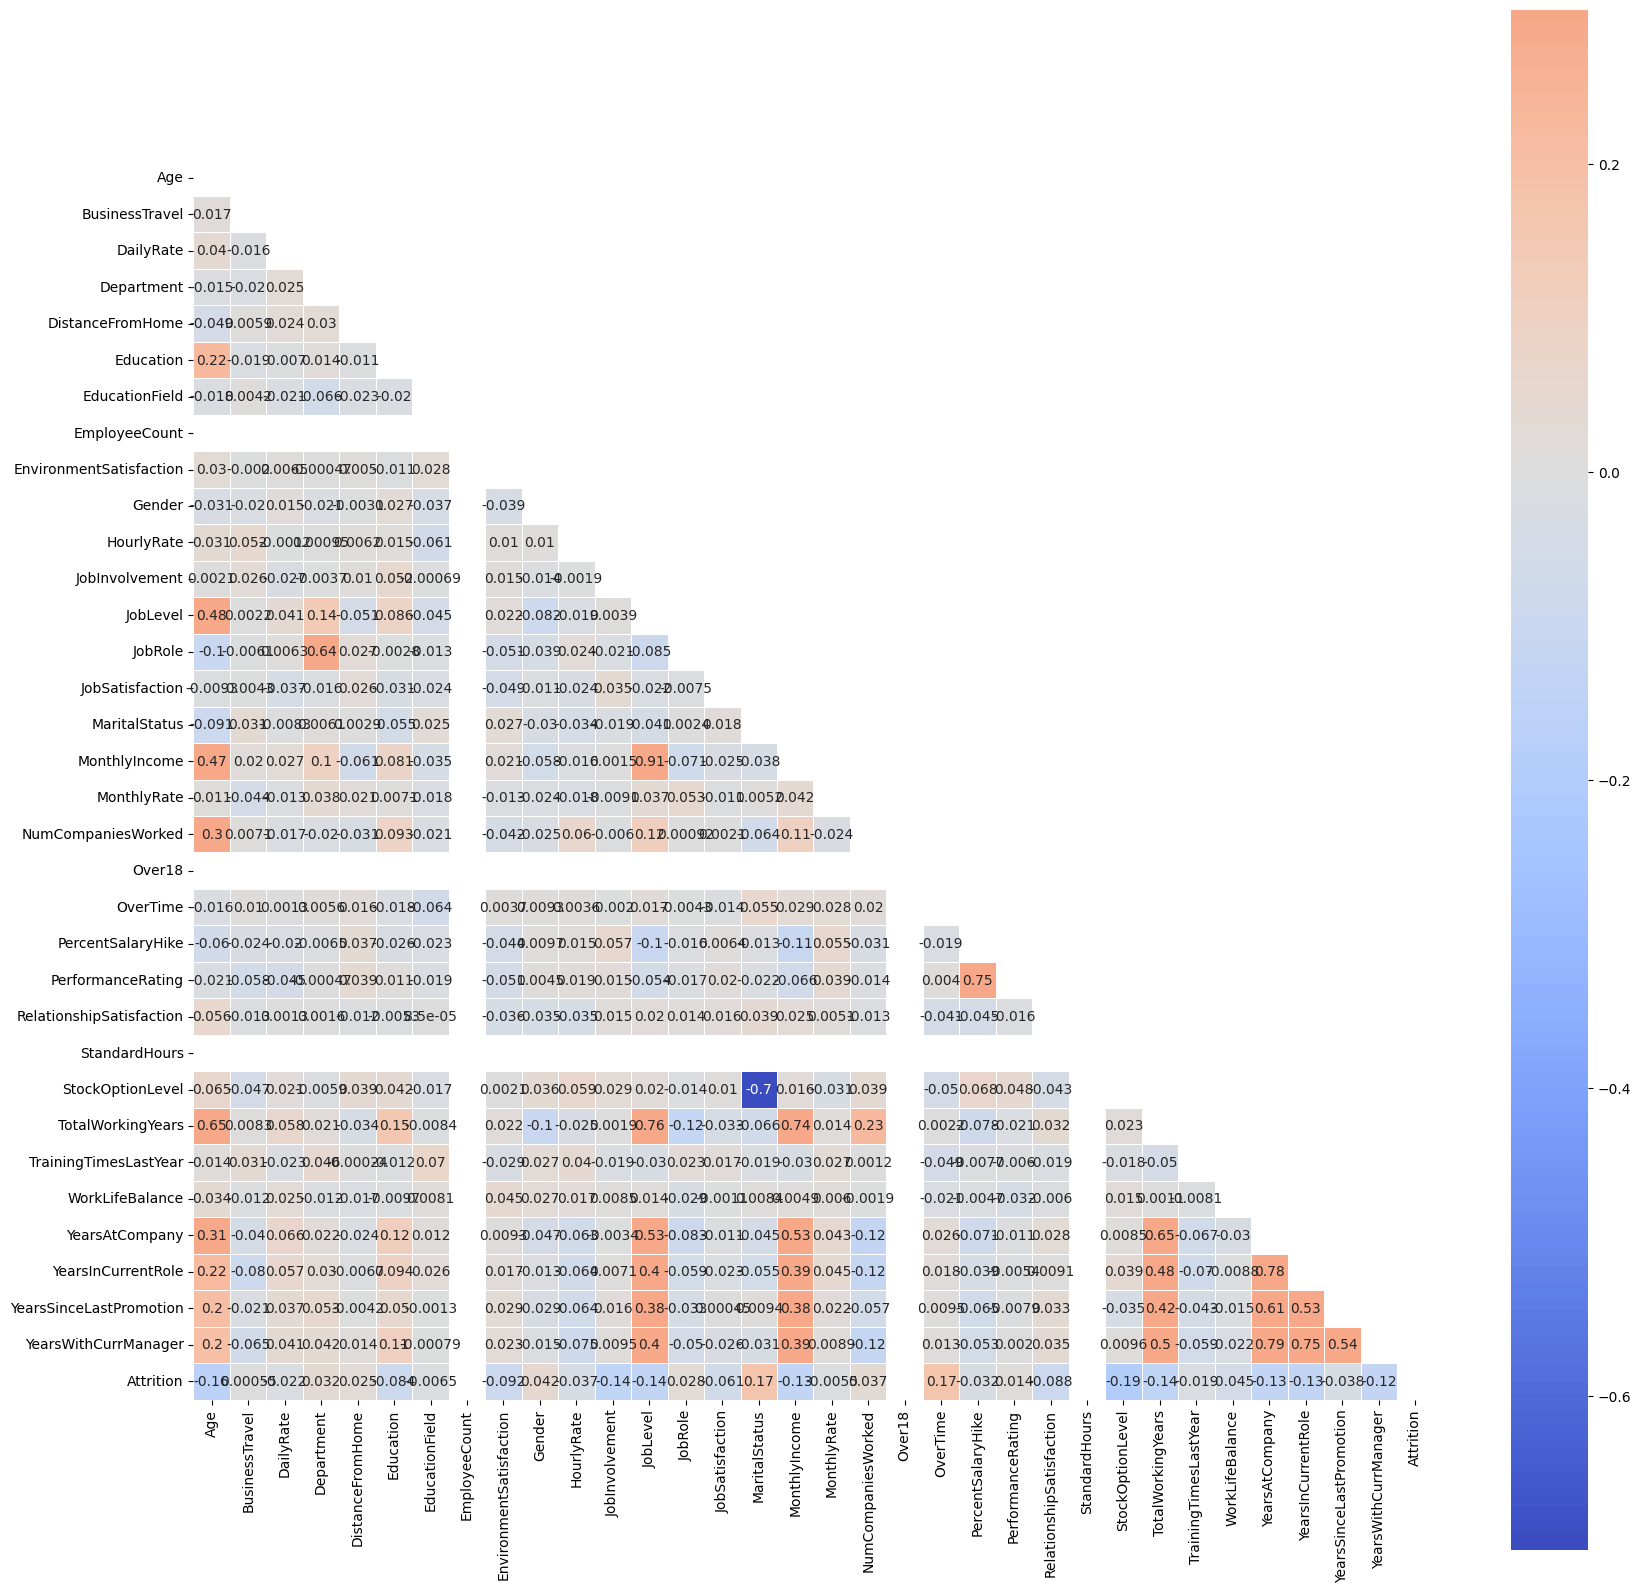

In [ ]:
plt.figure(figsize=(20,20))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

Notice the last column from right side of this map. We can see the correlation of all variables against Attrition. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

**Insights from the Heatmap:**

It's advisable to steer clear of correlated features within your dataset. Highly correlated features don't contribute significant additional information; instead, they often add unnecessary complexity to algorithms, raising the likelihood of errors.

## 2. Data Preparation




Now I will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.  In dataset our target variable is **Attrition**.

In [ ]:
# Separate target and feature column in X and y variable

target = 'Attrition'

# X will be the features
X = df.drop(target,axis=1)
#y will be the target variable
y = df[target]

**Y** have target variable and **X** have all other variable.

In [ ]:
#Get the info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1677 non-null   int64
 1   Age                       1677 non-null   int64
 2   BusinessTravel            1677 non-null   int64
 3   DailyRate                 1677 non-null   int64
 4   Department                1677 non-null   int64
 5   DistanceFromHome          1677 non-null   int64
 6   Education                 1677 non-null   int64
 7   EducationField            1677 non-null   int64
 8   EmployeeCount             1677 non-null   int64
 9   EnvironmentSatisfaction   1677 non-null   int64
 10  Gender                    1677 non-null   int64
 11  HourlyRate                1677 non-null   int64
 12  JobInvolvement            1677 non-null   int64
 13  JobLevel                  1677 non-null   int64
 14  JobRole                   1677 non-null 

In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((1677, 34), (1677,))

In [ ]:
# Reshape the y variable
y = y.values.reshape(-1,1)
# Again check the shape of X and y variable
X.shape, y.shape

((1677, 34), (1677, 1))

Let's split the dataset in **training** and **testing** data into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing part.

In [ ]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1341, 34), (336, 34), (1341, 1), (336, 1))

Here is necessary step because is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced

## 3. Train the model

Algorithms are going to use in this step:

1.  Logistic Regression
2.  Random Forest Classification
3.  KNearest Neighbor

The training should be started from **K-fold cross validation** to estimate the skill of the model on new data.


In [ ]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

1. Logistic Regression.
*It is used for predicting the categorical dependent variable using a given set of independent variables.*

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
LogisticRegression()
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)

0.883668903803132

In [ ]:
#Accuracy of test data
log_R.score(X_test, y_test)

0.8690476190476191

In [ ]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.32203059, 0.3345748 , 0.27317918, 0.3863337 , 0.39587425,
       0.2992528 , 0.3345748 , 0.34554737, 0.3345748 , 0.35618208])

In [ ]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train


0.33821243817008007

## 1. Logistic Regression.

Now I will perform **prediction** on the dataset using Logistic Regression.

In [ ]:
# Predict the values on X_test_scaled dataset
y_predicted = log_R.predict(X_test)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix


print("The model used is Logistic Regression")

l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))

prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))

rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))

f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 86.90476190476191
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       292
           1       0.00      0.00      0.00        44

    accuracy                           0.87       336
   macro avg       0.43      0.50      0.46       336
weighted avg       0.76      0.87      0.81       336



## 2. Random Forest Classifier

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers. The main logic of the first one is to grows and combines multiple decision trees to create a “forest.”

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
RandomForestClassifier()
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)


1.0

In [ ]:
#Accuracy of test data
clas.score(X_test, y_test)

0.8720238095238095

In [ ]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
Dta_scores

array([0.32203059, 0.35618208, 0.27317918, 0.37655152, 0.3863337 ,
       0.31147219, 0.34554737, 0.35618208, 0.3345748 , 0.35618208])

In [ ]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.3418235590872278

In [ ]:
# Prediction

Text(50.722222222222214, 0.5, 'True Class')

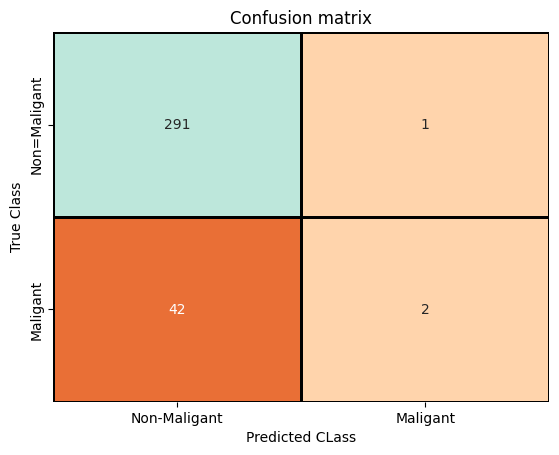

In [ ]:
# predict the values on X_test_scaled dataset
y_predicted = clas.predict(X_test)
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)
#We are drawing cm on heatmap to have better understanding
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<Axes: >

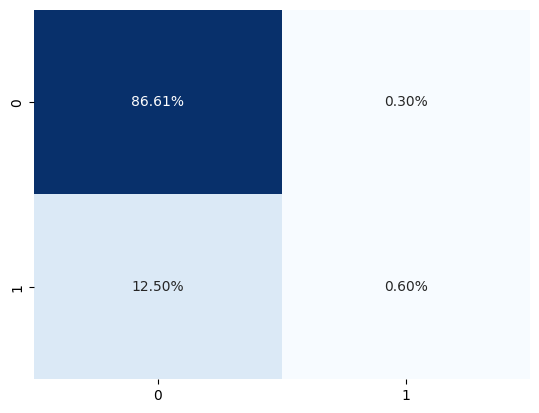

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar = False)

Evaluating all kinds of evaluating parameters

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix


print("The model used is Random Forest Classifier")

r_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is {}".format(r_acc))

prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Random Forest Classifier

The accuracy is 87.20238095238095
The precision is 0.6666666666666666
The recall is 0.045454545454545456
The F1-Score is 0.08510638297872342
Classification Report is:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       292
           1       0.67      0.05      0.09        44

    accuracy                           0.87       336
   macro avg       0.77      0.52      0.51       336
weighted avg       0.85      0.87      0.82       336



## 3. K Nearest Neighbour
*K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm*

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier()
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
Nn_scores

array([0.33333333, 0.34554737, 0.28651274, 0.42320737, 0.41429674,
       0.35618208, 0.37655152, 0.3863337 , 0.35618208, 0.37655152])

**Prediction**

Text(50.722222222222214, 0.5, 'True Class')

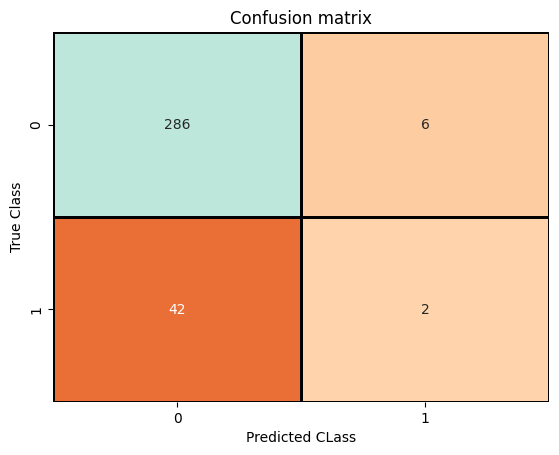

In [ ]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train# Predict the values on X_test_scaled dataset
y_predicted = classifier.predict(X_test.values)
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)
#We are drawing cm on heatmap to have better understanding
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<Axes: >

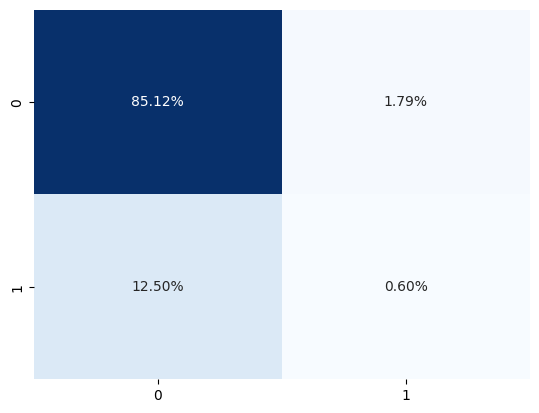

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar = False)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix


print("The model used is KNeighbors Classifier")

k_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(k_acc))

prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))

rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))

f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is KNeighbors Classifier

The accuracy is: 85.71428571428571
The precision is: 0.25
The recall is: 0.045454545454545456
The F1-Score is: 0.07692307692307693
Classification Report is:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       292
           1       0.25      0.05      0.08        44

    accuracy                           0.86       336
   macro avg       0.56      0.51      0.50       336
weighted avg       0.79      0.86      0.81       336



## Insights

In [ ]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbours',
                  'Random Forest']
cal_metric

,Score in percentage
Logistic Regression,86.904762
K-nearest Neighbours,85.714286
Random Forest,87.202381


Compare the algorithms score we ran above, we can noticed that  Random Forest Algorithm has the highest %. That means we will save this model.

The next step will be saving our model in pickel format file

In [ ]:
import pickle
pickle.dump(clas , open('Employee_Attrition_lo.pkl', 'wb'))
pickle.dump(clas , open('Employee_Attrition_kn.pkl', 'wb'))
pickle.dump(clas , open('Employee_Attrition_ra.pkl', 'wb'))
import pickle

def model_prediction(features):

    pickled_model = pickle.load(open('Employee_Attrition_ra.pkl', 'rb'))
    TravelInsurance = str(pickled_model.predict(features)[0])
    if TravelInsurance=='1':
        TravelInsurance='Yes'
    else:
        TravelInsurance='No'

    return str(f'The Employee Attrition is {TravelInsurance}')

Lets train our model on the defined data set

In [ ]:
Age = 28
BusinessTravel = 2
DailyRate = 866
Department = 2
DistanceFromHome = 5
Education = 3
EducationField = 3
EmployeeCount = 1
EmployeeNumber = 1469
EnvironmentSatisfaction = 4
Gender = 1
HourlyRate = 84
JobInvolvement = 3
JobLevel = 2
JobRole = 7
JobSatisfaction = 1
MaritalStatus = 2
MonthlyIncome = 8463
MonthlyRate = 23490
NumCompaniesWorked = 0
Over18 = 0
OverTime = 0
PercentSalaryHike = 18
PerformanceRating = 3
RelationshipSatisfaction = 4
StandardHours = 80
StockOptionLevel = 0
TotalWorkingYears = 6
TrainingTimesLastYear = 4
WorkLifeBalance = 3
YearsAtCompany = 5
YearsInCurrentRole = 4
YearsSinceLastPromotion = 1
YearsWithCurrManager = 3
model_prediction([[Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager]])

'The Employee Attrition is No'

The above model helps in predicting about employee attrition. The accuracy for the prediction is 87.07%.